# Practical 1: Processing ground-based gravity data

In this practical, we'll process a set of synthetic gravity surveys near the city of Cape Town, South Africa. The surveys were conducted with a LaCoste & Romberg Model G gravimeter and tied to a single base station (station 0). The synthetic data were generated based on public domain data for Southern Africa distributed by the [NOAA National Centers for Environmental Information](https://www.ngdc.noaa.gov/).

## Goals

* Process the survey data from raw readings into absolute gravity
* Merge them into a single database

## Data 

For this practical, you'll need:

* A zip archive with the survey data: [`cape-town-surveys.zip`](https://github.com/leouieda/gravity-processing/raw/main/data/cape-town-surveys.zip)
* The gravimeter calibration table to convert readings to mGal: [`gravimeter-scaling.csv`](https://raw.githubusercontent.com/leouieda/gravity-processing/main/data/gravimeter-scaling.csv)

Download both files, unzip the archive, and place everything into the **same folder as this notebook**. Your should folder structure should look like this:

```
gravity-practicals/
├── cape-town-surveys/
│   ├── cape-town-gravity-day-1.csv
│   ├── cape-town-gravity-day-2.csv
│   ├── cape-town-gravity-day-3.csv
│   ├── cape-town-gravity-day-4.csv
│   └── cape-town-gravity-day-5.csv
├── gravimeter-scaling.csv
└── practical1.ipynb
```

### Survey data

The survey files are in Comma Separated Values (CSV) format, which is a table of values with rows representing individual survey points and columns representing the position, time, and meter reading. For example, these are the first few lines of one of these files:

```
station_id,longitude,latitude,easting,northing,elevation,time_minutes,reading
0,18.34444,-34.12971,255105.43,6220276.33,32.2,0.0,2555.08
1,18.37418,-34.19583,258037.64,6213013.01,18.4,8.0,2565.12
2,18.40388,-34.23972,260899.25,6208214.71,25.0,14.0,2569.49
3,18.41112,-34.16444,261353.99,6216582.03,228.7,23.0,2514.59
```

* Station ID is a unique identifier (across all surveys) for each survey point. 
* Latitude and longitude are geographic coordinates in degress referenced to the WGS84 ellipsoid.
* Easting and northing are UTM coordinates in meters.
* Elevation is the height of gravimeter above the WGS84 ellipsoid in meters.
* Time are the minutes since the first reading at the base station.
* Reading is the gravimeter reading (unscaled) at that stattion.

The surveys were conducted in a loop, beginning and ending at the base station.

### Gravimeter calibration table

The gravimeter calibration table is particular to the gravimeter used for this survey. The table was provided by the manufacturer. This is what the first few lines of the table look like:

```
counter_reading,value_mgal,interval_factor
0000,0000.00,1.00636
0100,0100.64,1.00621
0200,0201.26,1.00609
0300,0301.87,1.00597
0400,0402.46,1.00588
0500,0503.05,1.00579
0600,0603.63,1.00570
0700,0704.20,1.00563
```

Convert the reading to mGal using the table values and the following equation:

```
reading_mgal = (reading - counter_reading) * interval_factor + value_mgal
```

### Base station

The base station for all surveys was the same. Here are it's properties:

* Station ID: 0
* Absolute gravity: 979656.12 mGal

## Import the required libraries

To deal with this type of tabular data, all we need are numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading CSV data with numpy

To import the CSV data into a numpy array, we'll use the `numpy.loadtxt` function. By default, it expects spaces between values instead of commas, so we have to use the `delimiter` argument to specify that it needs to use commas. We also need to skip the first line of the file that includes the header (names of each column) using the `skiprows` argument.

In [3]:
data = np.loadtxt("cape-town-surveys/cape-town-gravity-day-1.csv", delimiter=",", skiprows=1)
data

array([[ 0.00000000e+00,  1.83444400e+01, -3.41297100e+01,
         2.55105430e+05,  6.22027633e+06,  3.22000000e+01,
         0.00000000e+00,  2.55508000e+03],
       [ 1.00000000e+00,  1.83741800e+01, -3.41958300e+01,
         2.58037640e+05,  6.21301301e+06,  1.84000000e+01,
         8.00000000e+00,  2.56512000e+03],
       [ 2.00000000e+00,  1.84038800e+01, -3.42397200e+01,
         2.60899250e+05,  6.20821471e+06,  2.50000000e+01,
         1.40000000e+01,  2.56949000e+03],
       [ 3.00000000e+00,  1.84111200e+01, -3.41644400e+01,
         2.61353990e+05,  6.21658203e+06,  2.28700000e+02,
         2.30000000e+01,  2.51459000e+03],
       [ 4.00000000e+00,  1.84255700e+01, -3.42977800e+01,
         2.63060440e+05,  6.20182521e+06,  1.04000000e+02,
         4.10000000e+01,  2.56043000e+03],
       [ 5.00000000e+00,  1.84586000e+01, -3.42050000e+01,
         2.65844020e+05,  6.21219318e+06,  8.90000000e+00,
         5.20000000e+01,  2.55984000e+03],
       [ 6.00000000e+00,  1.848611

----

## Your turn

Create variables called `station_id`, `easting`, `northing`, `time`, and `reading` with the respective data values (columns in the `data` array).

Tip: Use array slicing (like `variable[5:10, 7:8]`) to separate each column of the array.


In [11]:
station_id = data[:, 0]
easting = data[:, 3]
northing = data[:, 4]
time = data[:, 6]
reading = data[:, 7]

This would also work (`.T` transposes an array): 

In [10]:
station_id, easting, northing, time, reading = data[:, [0, 3, 4, 6, 7]].T

----

## Plot the survey locations on a map

Now that we have the easting and northing coordinates of each point, we can plot them on a map to see what kind of layout this survey had.

Text(0.5, 1.0, 'Survey 1: station locations and IDs')

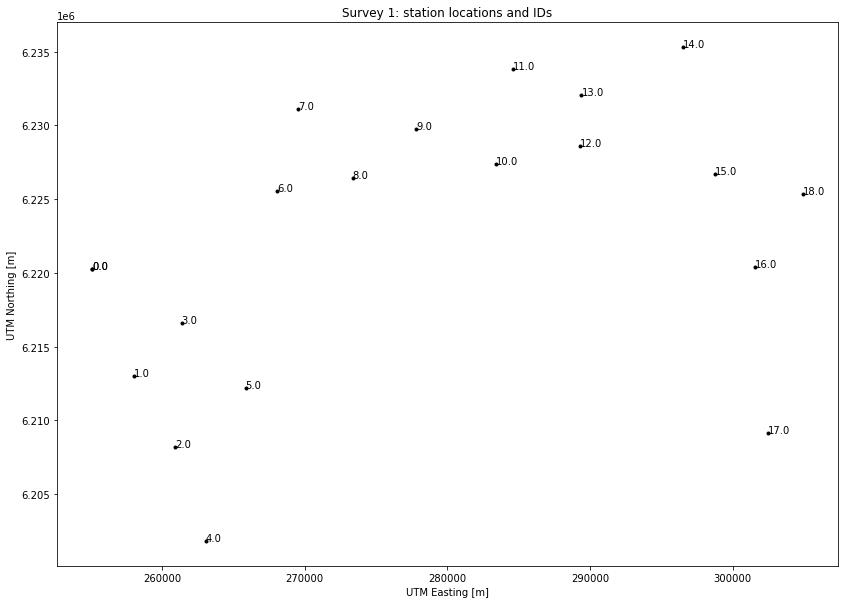

In [18]:
plt.figure(figsize=(14, 10))
plt.plot(easting, northing, ".k")
for i in range(station_id.size):
    plt.text(easting[i], northing[i], station_id[i])
plt.xlabel("UTM Easting [m]")
plt.ylabel("UTM Northing [m]")
plt.title("Survey 1: station locations and IDs")

## Drift correction

First thing we need to do is correct for the drift. Let's plot the first and last readings to see how much drift there was.

Text(0, 0.5, 'gravimeter reading')

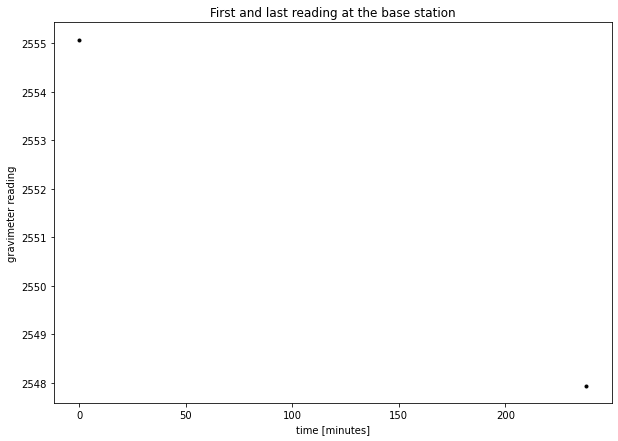

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(time[0], reading[0], ".k")
plt.plot(time[-1], reading[-1], ".k")
plt.title("First and last reading at the base station")
plt.xlabel("time [minutes]")
plt.ylabel("gravimeter reading")

Assuming that the drift is linear, we can calculate the drift factor $\alpha = \dfrac{\Delta r}{\Delta t}$

In [27]:
drift_factor = (reading[-1] - reading[0]) / (time[-1] - time[0])
print(drift_factor)

-0.029999999999999465


----

### Your turn

Apply the drift correction to the readings ($r_{corrected} = r - \alpha\ t$) and store the results in a variable called `reading_nodrift`. Make a plot of the raw readings and the corrected readings as a function of time (reading in y-axis, time in x-axis).

In [28]:
reading_nodrift = reading - drift_factor * time

Text(0, 0.5, 'gravimeter reading')

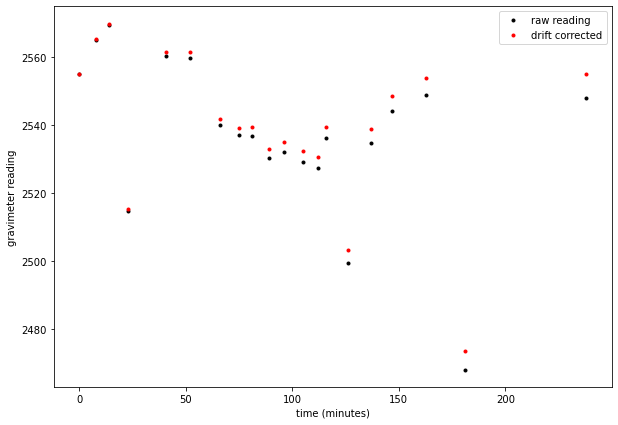

In [31]:
plt.figure(figsize=(10, 7))
plt.plot(time, reading, ".k", label="raw reading")
plt.plot(time, reading_nodrift, ".r", label="drift corrected")
plt.legend()
plt.xlabel("time (minutes)")
plt.ylabel("gravimeter reading")

----

## Convert readings to mGal

The next step is to convert the drif-corrected readings to mGal using the conversion table for this gravimeter. First, we have to load the conversion table using numpy.

In [32]:
conversion_table = np.loadtxt("gravimeter-scaling.csv", delimiter=",", skiprows=1)
conversion_table

array([[0.00000e+00, 0.00000e+00, 1.00636e+00],
       [1.00000e+02, 1.00640e+02, 1.00621e+00],
       [2.00000e+02, 2.01260e+02, 1.00609e+00],
       [3.00000e+02, 3.01870e+02, 1.00597e+00],
       [4.00000e+02, 4.02460e+02, 1.00588e+00],
       [5.00000e+02, 5.03050e+02, 1.00579e+00],
       [6.00000e+02, 6.03630e+02, 1.00570e+00],
       [7.00000e+02, 7.04200e+02, 1.00563e+00],
       [8.00000e+02, 8.04760e+02, 1.00557e+00],
       [9.00000e+02, 9.05320e+02, 1.00551e+00],
       [1.00000e+03, 1.00587e+03, 1.00544e+00],
       [1.10000e+03, 1.10642e+03, 1.00539e+00],
       [1.20000e+03, 1.20695e+03, 1.00533e+00],
       [1.30000e+03, 1.30749e+03, 1.00528e+00],
       [1.40000e+03, 1.40802e+03, 1.00524e+00],
       [1.50000e+03, 1.50854e+03, 1.00522e+00],
       [1.60000e+03, 1.60906e+03, 1.00520e+00],
       [1.70000e+03, 1.70958e+03, 1.00519e+00],
       [1.80000e+03, 1.81010e+03, 1.00518e+00],
       [1.90000e+03, 1.91062e+03, 1.00518e+00],
       [2.00000e+03, 2.01114e+03, 1.0051

In [34]:
# Separate the columns of the table into variables
counter_reading = conversion_table[:, 0]
value_mgal = conversion_table[:, 1]
interval_factor = conversion_table[:, 2]

To illustrate how this is done, let's convert the first reading to mGal. We'll use the values in the table and the formula given above for the conversion.

The trick is figuring out the position (row) in the table that has the values we want for a particular reading. The reading has to be within the counter interval for that row. For example, a reading of 2710 would use the values in row 27 of the table. The position/row can be calculated using the integer division (ignoring the remainder and decimal places) of the reading by 100. With this, we can get the exact conversion factor and value in mGal from the table.

In [36]:
reading0 = reading[0]
print(reading0)

2555.08


In [43]:
position = int(reading0 // 100)
print(position)

25


In [44]:
print(counter_reading[position], value_mgal[position], interval_factor[position])

2500.0 2513.74 1.00528


In [45]:
reading0_mgal = (reading0 - counter_reading[position]) * interval_factor[position] + value_mgal[position]
print(reading0_mgal)

2569.1108223999995


Now that we know how to convert one reading, we can repeat this for all readings using a `for` loop. We can use the `range` function to generate a list of values from 0 to a given number. These will be the position of the readings in our array.

In [48]:
# Start with an empty array and fill it one element at a time
reading_mgal = np.empty(reading.size)
for i in range(reading.size):
    position = int(reading[i] // 100)
    reading_mgal[i] = (reading[i] - counter_reading[position]) * interval_factor[position] + value_mgal[position]
print(reading_mgal)

[2569.1108224 2579.2038336 2583.5969072 2528.4070352 2574.4890704
 2573.8959552 2553.8808304 2550.9454128 2550.8750432 2544.250248
 2546.1200688 2543.1645456 2541.1137744 2550.030608  2513.0915875
 2548.67348   2558.273904  2562.8579808 2481.5870525 2561.9331232]


## Calculate absolute gravity

Tie things to the base station gravity and calculate absolute gravity. Plot using scatter.

----

## Your turn

Repeat the calculations for every survey. Combine the coordinates, elevation, and absolute gravity into a single data array. Use numpy.concatenate. Save to CSV using `numpy.savetxt`.